In [76]:
import pandas as pd
import numpy as np
# read the tmdb_movies.csv file

movies_data = pd.read_csv('tmdb_movies_data.csv')
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [77]:
# Dropping unnecessary columns and rows with missing values in critical columns
columns_to_drop = ['homepage', 'tagline', 'keywords', 'imdb_id', 'overview', 'budget', 'revenue', 'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
movies_data_cleaned = movies_data.drop(columns=columns_to_drop).dropna(subset=['cast', 'director', 'genres'])

# Removing duplicate entries
movies_data_cleaned = movies_data_cleaned.drop_duplicates()

# Splitting 'cast' and 'genres' into lists
movies_data_cleaned['cast'] = movies_data_cleaned['cast'].apply(lambda x: x.split('|'))
movies_data_cleaned['genres'] = movies_data_cleaned['genres'].apply(lambda x: x.split('|'))

# Feature selection
selected_features = ['original_title', 'cast', 'director', 'genres', 'production_companies']
movies_data_prepared = movies_data_cleaned[selected_features]

# Displaying the cleaned and prepared dataset
movies_data_prepared.head()


,original_title,cast,director,genres,production_companies
0,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...
2,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...
3,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot
4,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...


In [78]:
import networkx as nx

# Creating a graph
G = nx.Graph()

# Adding a subset of the data to the graph
# We will add nodes for movies, actors, directors, and genres, and then define the relationships
subset_data = movies_data_prepared.head(10)  # Taking a subset for demonstration

# Adding nodes and edges to the graph
for _, row in subset_data.iterrows():
    movie_title = row['original_title']
    cast = row['cast']
    director = row['director']
    genres = row['genres']
    production_companies = row['production_companies']

    # Adding movie node
    G.add_node(movie_title, type='movie')

    # Adding director node and edge
    G.add_node(director, type='director')
    G.add_edge(movie_title, director, relationship='directed_by')

    # Adding cast nodes and edges
    for actor in cast:
        G.add_node(actor, type='actor')
        G.add_edge(movie_title, actor, relationship='acted_in')

    # Adding genre nodes and edges
    for genre in genres:
        G.add_node(genre, type='genre')
        G.add_edge(movie_title, genre, relationship='belongs_to_genre')

    # Adding production company nodes and edges
    for company in production_companies:
        G.add_node(company, type='production_company')
        G.add_edge(movie_title, company, relationship='produced_by')

# Checking the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges



(126, 339)

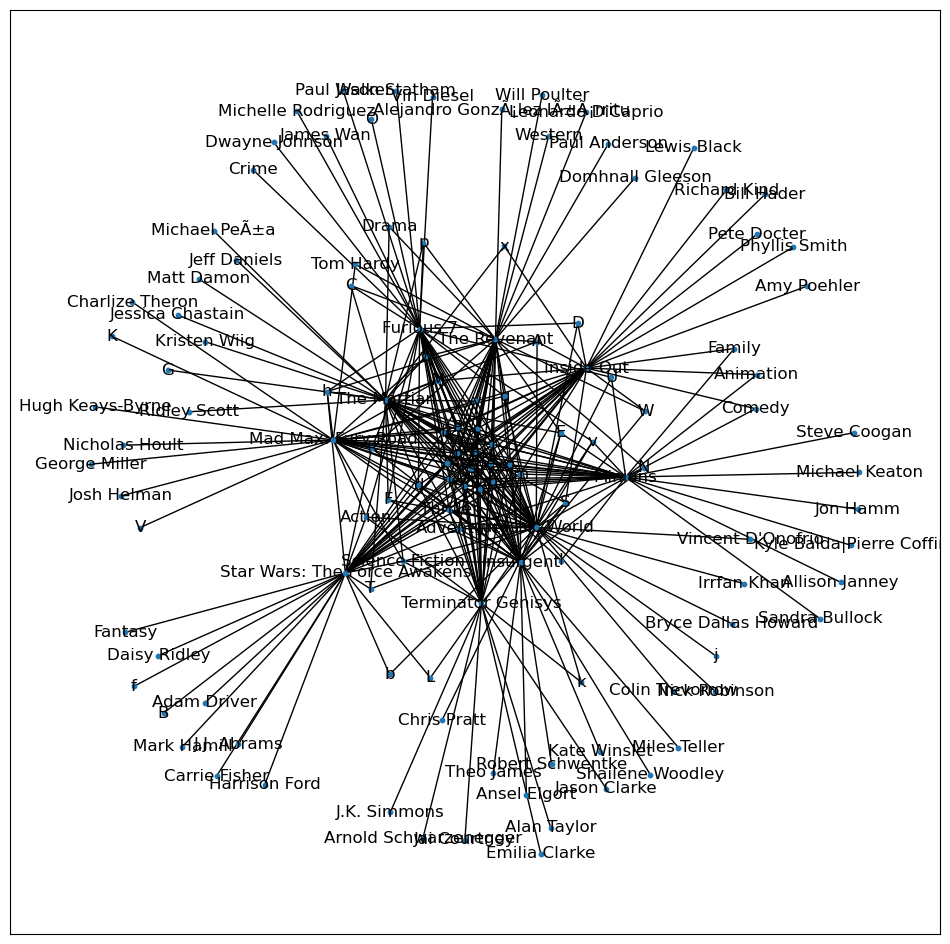

In [79]:
# Visualizing the graph

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Setting the size of the figure
plt.figure(figsize=(12, 12))

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=10)

# Showing the graph
plt.show()



In [80]:
def process_batch(data_batch, graph):
    for _, row in data_batch.iterrows():
        movie_title = row['original_title']
        cast = row['cast']
        director = row['director']
        genres = row['genres']
        production_companies = row['production_companies']

        # Add movie node
        if not graph.has_node(movie_title):
            graph.add_node(movie_title, type='movie')

        # Add director node and edge
        if not graph.has_node(director):
            graph.add_node(director, type='director')
        if not graph.has_edge(movie_title, director):
            graph.add_edge(movie_title, director, relationship='directed_by')

        # Add cast nodes and edges
        for actor in cast:
            if not graph.has_node(actor):
                graph.add_node(actor, type='actor')
            if not graph.has_edge(movie_title, actor):
                graph.add_edge(movie_title, actor, relationship='acted_in')

        # Add genre nodes and edges
        for genre in genres:
            if not graph.has_node(genre):
                graph.add_node(genre, type='genre')
            if not graph.has_edge(movie_title, genre):
                graph.add_edge(movie_title, genre, relationship='belongs_to_genre')

        # Add production company nodes and edges
        for company in production_companies:
            if not graph.has_node(company):
                graph.add_node(company, type='production_company')
            if not graph.has_edge(movie_title, company):
                graph.add_edge(movie_title, company, relationship='produced_by')

    return graph


In [81]:
# Batch processing of the data

import pandas as pd
import networkx as nx

def process_batch(data_batch, graph):
    for _, row in data_batch.iterrows():
        movie = row['original_title']  # Replace with your actual column name
        actors = row['cast']  # Replace with your actual column name
        director = row['director']
        genres = row['genres']
        production_companies = row['production_companies']

        # Add movie node
        graph.add_node(movie, type='movie')

        if pd.notna(actors) and isinstance(actors, str):
            # Assuming actors are separated by '|'
            actors_list = actors.split('|')
        
            # Add actor nodes and edges
            for actor in actors_list:
                graph.add_node(actor, type='actor')
                graph.add_edge(movie, actor, relationship='acted_in')

        if pd.notna(genres) and isinstance(genres, str):
            # Assuming genres are separated by '|'
            genres_list = genres.split('|')
        
            # Add genre nodes and edges
            for genre in genres_list:
                graph.add_node(genre, type='genre')
                graph.add_edge(movie, genre, relationship='belongs_to_genre')
        
        # Add director node and edge
        graph.add_node(director, type='director')
        graph.add_edge(movie, director, relationship='directed_by')

        # Check if production_companies is not NaN and is a string
        if pd.notna(production_companies) and isinstance(production_companies, str):
        # Assuming production companies are separated by '|'
            production_companies_list = production_companies.split('|')
        
            for company in production_companies_list:
                graph.add_node(company, type='production_company')
                graph.add_edge(movie, company, relationship='produced_by')

        else:
            continue
    return graph

# Initialize the graph
G = nx.Graph()

# Define batch size
batch_size = 1000  # Adjust based on your dataset and memory capacity

# Process in batches
for start in range(0, movies_data.shape[0], batch_size):
    end = start + batch_size
    batch_data = movies_data.iloc[start:end]
    G = process_batch(batch_data, G)

# Save the graph
nx.write_gpickle(G, "movie_graph.gpickle")


In [82]:
# load the pickle for networkx graph

import networkx as nx

# Load the graph
G = nx.read_gpickle("movie_graph.gpickle")

# Build a recommendation engine using the graph data

# # Function to get the neighbors of a node

# def get_neighbors(G, node, relationship=None, relationship_value=None):
#     """
#     Returns a list of neighbors of a node in a graph
#     """
#     neighbors = []
#     for n in G.neighbors(node):
#         if relationship:
#             data = G.get_edge_data(node, n)
#             if data and data['relationship'] == relationship and data['weight'] >= relationship_value:
#                 neighbors.append(n)
#         else:
#             neighbors.append(n)
#     return neighbors

# # Function to get the recommendations

# def get_recommendations(G, node, relationship=None, relationship_value=None, k=10):
#     """
#     Returns a list of recommendations for a node in a graph
#     """
#     recommendations = []
#     neighbors = get_neighbors(G, node, relationship=relationship, relationship_value=relationship_value)
#     for n in neighbors:
#         recommendations.extend(get_neighbors(G, n, relationship=relationship, relationship_value=relationship_value))
#     return list(set(recommendations) - set([node]))[:k]


# # Get recommendations for a movie
# get_recommendations(G, 'Cars', relationship='belongs_to_genre', relationship_value=0.5, k=10)


def recommend_movies_based_on_genre(graph, favorite_movie):
    # Find the genres of the favorite movie
    genres = [n for n in graph.neighbors(favorite_movie) if graph.nodes[n]['type'] == 'genre']

    # Find movies in these genres
    recommended_movies = set()
    for genre in genres:
        movies = [n for n in graph.neighbors(genre) if graph.nodes[n]['type'] == 'movie']
        recommended_movies.update(movies)
    
    # Remove the favorite movie itself from recommendations
    recommended_movies.discard(favorite_movie)

    return list(recommended_movies)


def recommend_movies_based_on_actor_director(graph, actor_or_director):
    # Find all movies connected to the given actor or director
    movies = [n for n in graph.neighbors(actor_or_director) if graph.nodes[n]['type'] == 'movie']
    
    # Optionally, filter out movies already seen by the user
    # movies = [movie for movie in movies if not user_has_seen(movie)]

    return movies


def recommend_movies_based_on_production_company(graph, production_company):
    # Find all movies connected to the given production company
    movies = [n for n in graph.neighbors(production_company) if graph.nodes[n]['type'] == 'movie']
    
    # Optionally, filter out movies already seen by the user
    # movies = [movie for movie in movies if not user_has_seen(movie)]

    return movies

In [83]:
G = nx.read_gpickle("movie_graph.gpickle")
# Print the first 10 nodes in the graph
print("First 10 nodes in the graph:", list(G.nodes())[:10])




First 10 nodes in the graph: ['Jurassic World', 'Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', "Vincent D'Onofrio", 'Nick Robinson', 'Action', 'Adventure', 'Science Fiction', 'Thriller']


In [89]:
# Testing the recommendation functions

# Load the graph
G = nx.read_gpickle("movie_graph.gpickle")

# Return the recommendations in a better format for readability and display

def get_movie_details(G, movie):
    """
    Returns the details of a movie
    """
    movie_details = {}
    movie_details['title'] = movie
    movie_details['genres'] = [n for n in G.neighbors(movie) if G.nodes[n]['type'] == 'genre']
    movie_details['actors'] = [n for n in G.neighbors(movie) if G.nodes[n]['type'] == 'actor']
    movie_details['directors'] = [n for n in G.neighbors(movie) if G.nodes[n]['type'] == 'director']
    movie_details['production_companies'] = [n for n in G.neighbors(movie) if G.nodes[n]['type'] == 'production_company']
    return movie_details


def get_recommendation_details(G, recommendations):
    """
    Returns the details of the recommendations
    """
    recommendation_details = []
    for movie in recommendations:
        movie_details = get_movie_details(G, movie)
        recommendation_details.append(movie_details)
    return recommendation_details


# # Test genre-based recommendation
# genre_recommendations = recommend_movies_based_on_genre(G, "Silent Hill")[:10]
# genre_recommendation_details = get_recommendation_details(G, genre_recommendations)

# print("Genre-Based Recommendations:")

# for movie in genre_recommendation_details:
#     print("Title:", movie['title'])
#     print("Genres:", movie['genres'])
#     print("Actors:", movie['actors'])
#     print("Directors:", movie['directors'])
#     print("Production Companies:", movie['production_companies'])
#     print("")


# Test actor/director-based recommendation
actor_director_recommendations = recommend_movies_based_on_actor_director(G, "Quentin Tarantino")[:10]
actor_director_recommendation_details = get_recommendation_details(G, actor_director_recommendations)

print("Actor/Director-Based Recommendations:")
3
for movie in actor_director_recommendation_details:
    print("Title:", movie['title'])
    print("Genres:", movie['genres'])
    print("Actors:", movie['actors'])
    print("Directors:", movie['directors'])
    print("Production Companies:", movie['production_companies'])
    print("")


# # Test production company-based recommendation

# production_company_recommendations = recommend_movies_based_on_production_company(G, "Sony Pictures")[:10]
# production_company_recommendation_details = get_recommendation_details(G, production_company_recommendations)

# print("Production Company-Based Recommendations:")
# for movie in production_company_recommendation_details:
#     print("Title:", movie['title'])
#     print("Genres:", movie['genres'])
#     print("Actors:", movie['actors'])
#     print("Directors:", movie['directors'])
#     print("Production Companies:", movie['production_companies'])
#     print("")

Actor/Director-Based Recommendations:
Title: The Hateful Eight
Genres: ['Crime', 'Drama', 'Mystery', 'Western']
Actors: ['Samuel L. Jackson', 'Kurt Russell', 'Jennifer Jason Leigh', 'Walton Goggins', 'DemiÃ¡n Bichir']
Directors: ['Quentin Tarantino']
Production Companies: ['Double Feature Films', 'The Weinstein Company', 'FilmColony']

Title: Inglourious Basterds
Genres: ['Drama', 'Action', 'Thriller', 'War']
Actors: ['Brad Pitt', 'MÃ©lanie Laurent', 'Christoph Waltz', 'Michael Fassbender']
Directors: ['Eli Roth', 'Quentin Tarantino']
Production Companies: ['Universal Pictures', 'A Band Apart', 'Zehnte Babelsberg', 'Visiona Romantica']

Title: Kill Bill: The Whole Bloody Affair
Genres: ['Crime', 'Action']
Actors: ['Uma Thurman', 'Lucy Liu', 'Vivica A. Fox', 'Daryl Hannah', 'David Carradine']
Directors: ['Quentin Tarantino']
Production Companies: ['Miramax Films', 'A Band Apart', 'Super Cool ManChu']

Title: Pulp Fiction
Genres: ['Thriller', 'Crime']
Actors: ['John Travolta', 'Samuel L.

In [85]:
# Defining a function to get the neighbors of a node using networkx 

# Load the graph
G = nx.read_gpickle("movie_graph.gpickle")

def get_neighbors(G, node, relationship=None, relationship_value=None):
    """
    Returns a list of neighbors of a node in a graph
    """
    neighbors = []
    for n in G.neighbors(node):
        if relationship:
            data = G.get_edge_data(node, n)
            if data and data['relationship'] == relationship and data['weight'] >= relationship_value:
                neighbors.append(n)
        else:
            neighbors.append(n)
    return neighbors

def recommend_movies_based_on_common_attributes(G, node, k=10):
    """
    Returns a list of recommendations based on common attributes
    """
    recommendations = []
    neighbors = get_neighbors(G, node)
    for n in neighbors:
        recommendations.extend(get_neighbors(G, n))
    return list(set(recommendations) - set([node]))[:k]


# Test common attributes-based recommendation
common_attributes_recommendations = recommend_movies_based_on_common_attributes(G, "The Conjuring")
print("Common Attributes-Based Recommendations:", common_attributes_recommendations)





Common Attributes-Based Recommendations: ['Survival of the Dead', 'Grosse Pointe Blank', 'Phantasm II', 'Idlewild', "No Man's Land", 'GoldenEye', 'Lesbian Vampire Killers', 'Contraband', 'Divergent', 'House III: The Horror Show']
